## Checking molar weight bin effect on top-1 accuracy

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Descriptors import MolWt

Load high molar weight splits predictions

In [2]:
transformer_high = pd.read_csv("../data/predictions/transformer_high.csv")
graph2smiles_high = pd.read_csv("../data/predictions/graph2smiles_high.csv")

Define bin count function

In [3]:
def bin_mw_count(df, bins):
    df["target_mw"] = df["target"].apply(
        lambda x: MolWt(Chem.MolFromSmiles(x)) if Chem.MolFromSmiles(x) else 1000
    )
    results = []

    for i, row in df.iterrows():
        results.append(row["target"] == row["pred_0"])

    df["correct"] = results

    mw_acc = df.groupby(pd.cut(df["target_mw"], bins)).apply(
        lambda x: x["correct"].sum() / len(x) * 100
    )

    return mw_acc

Create bins and count number of samples in each bin for high mw splits

In [4]:
mw_bins = [700, 800, 900, 1000, 1100, 1200, 5000]

accs = pd.DataFrame()

for i in (transformer_high, graph2smiles_high):
    x = bin_mw_count(i, mw_bins)
    # concatenate series to dataframe
    accs = pd.concat([accs, x], axis=1)

In [5]:
accs.columns = ["Transformer", "Graph2Smiles"]

accs.index = mw_bins[:-1]
accs

,Transformer,Graph2Smiles
700,56.909395,59.470964
800,24.408319,48.003825
900,4.956214,36.370412
1000,1.121138,25.266612
1100,0.199760,13.543748
1200,0.044352,3.134240


In [6]:
# melt dataframe
accs_full = accs.melt(ignore_index=False)

accs_full.columns = ["model", "accuracy"]

In [12]:
accs_full

,model,accuracy
700,Transformer,56.909395
800,Transformer,24.408319
900,Transformer,4.956214
1000,Transformer,1.121138
1100,Transformer,0.199760
1200,Transformer,0.044352
700,Graph2Smiles,59.470964
800,Graph2Smiles,48.003825
900,Graph2Smiles,36.370412
1000,Graph2Smiles,25.266612


Plot bin count

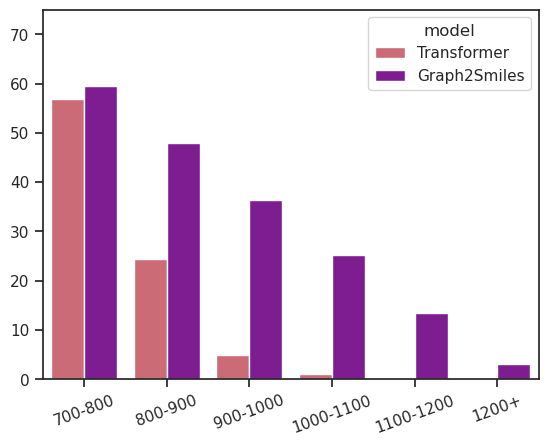

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(
    data=accs_full,
    y="accuracy",
    x=accs_full.index,
    hue="model",
    palette={"Transformer": "#DB5B68", "Graph2Smiles": "#8B0AA5"},
)
plt.ylabel("")
# plt.xlabel('MW range (g/mol)')
plt.ylim((0, 75))
# set xtick labels
ax.set_xticklabels(
    ["700-800", "800-900", "900-1000", "1000-1100", "1100-1200", "1200+"], rotation=20
)
plt.savefig("high_mw.svg", bbox_inches="tight")
# plt.title('Accuracy by Molecular Weight for high mw test set');

### Low molar weight split

In [19]:
low_bins = [25, 50, 75, 100, 125, 150]

transformer_low = pd.read_csv("../data/predictions/transformer_low.csv")
graph2smiles_low = pd.read_csv("../data/predictions/graph2smiles_low.csv")


accs_low = pd.DataFrame()

for i in (transformer_low, graph2smiles_low):
    x = bin_mw_count(i, low_bins)
    # concatenate series to dataframe
    accs_low = pd.concat([accs_low, x], axis=1)

accs_low.columns = ["Transformer", "Graph2Smiles"]

accs_low

[09:22:33] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
[09:22:36] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


,Transformer,Graph2Smiles
"(25, 50]",2.127660,2.127660
"(50, 75]",17.305315,24.969098
"(75, 100]",35.763576,51.245125
"(100, 125]",55.087844,63.167752
"(125, 150]",68.544739,70.639243


In [21]:
accs_low.index = low_bins[:-1]

accs_low_full = accs_low.melt(ignore_index=False)

accs_low_full.columns = ["model", "accuracy"]

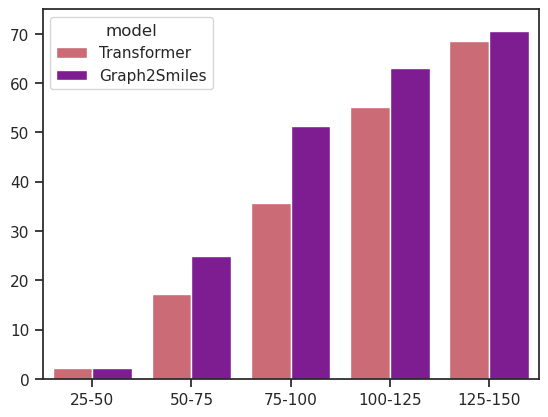

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(
    data=accs_low_full,
    y="accuracy",
    x=accs_low_full.index,
    hue="model",
    palette={"Transformer": "#DB5B68", "Graph2Smiles": "#8B0AA5"},
)
plt.ylabel("")
plt.ylim((0, 75))
ax.set_xticklabels(["25-50", "50-75", "75-100", "100-125", "125-150"], rotation=0)
plt.savefig("low_mw.svg", bbox_inches="tight")
# plt.title('Accuracy by Molecular Weight for low mw test set');